In [2]:
import logging
#import sys
#import os
from ast import literal_eval
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor,plot_tree
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import GridSearchCV

"""# Add the SummerResearch2024 directory to sys.path
sys.path.append(os.path.abspath(os.path.join(os.path.dirname(__file__), '..')))"""

"# Add the SummerResearch2024 directory to sys.path\nsys.path.append(os.path.abspath(os.path.join(os.path.dirname(__file__), '..')))"

In [57]:
class DTClassifier:
    def __init__(self, df):
        print(df.columns)
        # Set up data
        self.X = df[['learning style', 'major', 'previous courses', 'course types', 
                'course subjects', 'subjects of interest', 'extracurricular activities']]
        # Change the lists into just the elements within them
        for column in self.X.columns:
            self.X.loc[:,column] = self.X[column].apply(lambda x: x[0])
        
        self.y = df[['ethnoracial group']]
        """, 'gender', 
                'international status']]"""
        
        # Change the doubles into integers
        self.y = self.y.astype(int)
        print(self.X.head())
        print(self.y.head())

    def classifier(self):
        clf = DecisionTreeClassifier()
        self.model = clf.fit(self.X, self.y)
        self.save_model('decision_tree_model.pkl')

    def plotter(self):
        # Plot the tree using matplotlib
        plt.figure(figsize=(20,10))
        plot_tree(self.model, 
                  feature_names=self.X.columns, 
                  class_names=self.y.columns,
                  filled=True, 
                  rounded=True)
        print(plot_tree)
        plt.savefig('decision_tree.png')
        plt.close()

    def save_model(self, file_path):
        joblib.dump(self.model, file_path)
        print(f"Model saved to {file_path}")

    def load_model(self, file_path):
        self.model = joblib.load(file_path)
        print(f"Model loaded from {file_path}")

In [58]:
# Get Data Paths
data_path = f'../../data_preprocessing/reduced_dimensionality_data/{privatization_type}/{RNN_model}_combined.csv'

data = pd.read_csv(data_path, nrows=1000, converters={
    'learning style': literal_eval,
    'major': literal_eval,
    'previous courses': literal_eval,
    'course types': literal_eval,
    'course subjects': literal_eval,
    'subjects of interest': literal_eval,
    'extracurricular activities': literal_eval,
    'career aspirations': literal_eval,
    'future topics': literal_eval
})

In [60]:
# Set up data
X = data[['learning style', 'major', 'previous courses', 'course types', 
        'course subjects', 'subjects of interest', 'extracurricular activities']]
# Change the lists into just the elements within them
for column in X.columns:
    X.loc[:,column] = X[column].apply(lambda x: x[0])

y = data[['ethnoracial group']]
""", 'gender', 
        'international status']]"""
# Change the doubles into integers
y = y.astype(int)
print(X.head())
print(y.head())

  learning style     major previous courses course types course subjects  \
0       0.490477  0.530964         0.355436     0.511513        0.559243   
1       0.489931  0.465843          0.06634     0.506288        0.506853   
2       0.489931  0.512512         0.473605     0.509167        0.511175   
3       0.489931   0.48715         0.704632     0.507906        0.523821   
4       0.489104  0.509545         0.266885     0.509174        0.499915   

  subjects of interest extracurricular activities  
0             0.505308                   0.495185  
1             0.510923                   0.492835  
2             0.494576                   0.509085  
3             0.488334                   0.544595  
4             0.500476                   0.489449  
   ethnoracial group
0                  0
1                  0
2                  1
3                  0
4                  0


In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.8,
                                                    random_state = 1234) 

In [62]:
clf = DecisionTreeClassifier()
#model = clf.fit(X_train, y_train)

In [63]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

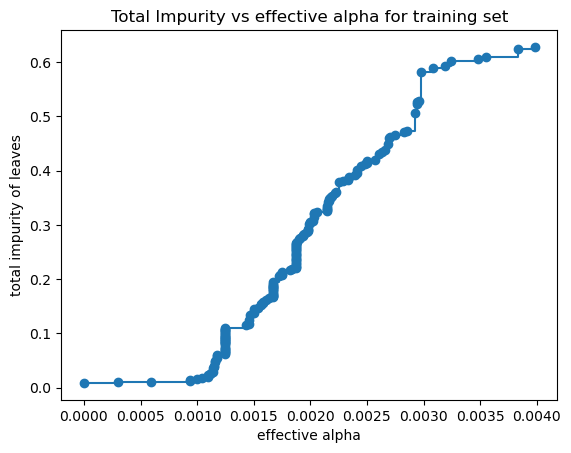

In [64]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [65]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.0040192602040817205


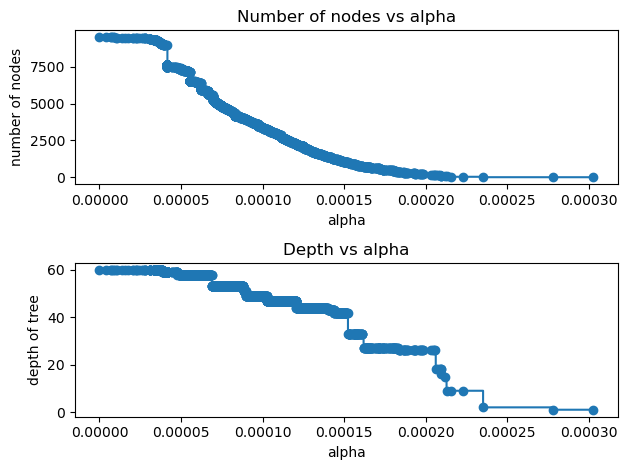

In [52]:
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

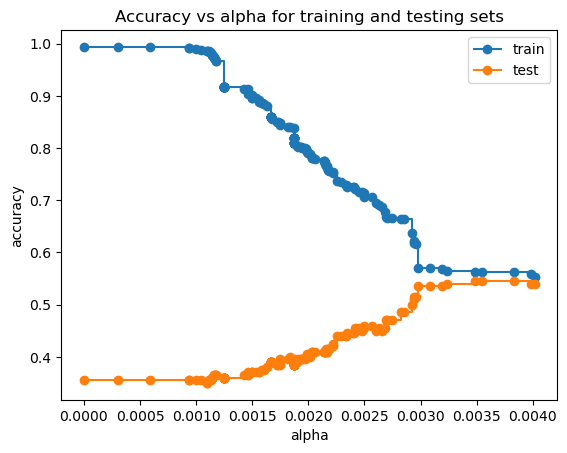

In [66]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [70]:
models_data = {
    'models': clfs,
    'ccp alpha': ccp_alphas,
    'train scores': train_scores,
    'test scores': test_scores
}

In [72]:
models = pd.DataFrame(models_data)
models

,models,ccp alpha,train scores,test scores
0,DecisionTreeClassifier(random_state=0),0.000000,0.99375,0.355
1,DecisionTreeClassifier(ccp_alpha=0.00030392156...,0.000304,0.99375,0.355
2,DecisionTreeClassifier(ccp_alpha=0.00058823529...,0.000588,0.99375,0.355
3,"DecisionTreeClassifier(ccp_alpha=0.0009375, ra...",0.000937,0.99125,0.355
4,"DecisionTreeClassifier(ccp_alpha=0.0009375, ra...",0.000937,0.99125,0.355
...,...,...,...,...
171,DecisionTreeClassifier(ccp_alpha=0.00348214285...,0.003482,0.56250,0.545
172,DecisionTreeClassifier(ccp_alpha=0.00354781980...,0.003548,0.56250,0.545
173,DecisionTreeClassifier(ccp_alpha=0.00383386235...,0.003834,0.56250,0.545
174,DecisionTreeClassifier(ccp_alpha=0.00398313492...,0.003983,0.55875,0.540


In [73]:
models_sorted = models.sort_values(by='test scores', ascending=False)
models_sorted

,models,ccp alpha,train scores,test scores
173,DecisionTreeClassifier(ccp_alpha=0.00383386235...,0.003834,0.56250,0.545
172,DecisionTreeClassifier(ccp_alpha=0.00354781980...,0.003548,0.56250,0.545
171,DecisionTreeClassifier(ccp_alpha=0.00348214285...,0.003482,0.56250,0.545
175,DecisionTreeClassifier(ccp_alpha=0.00401926020...,0.004019,0.55375,0.540
174,DecisionTreeClassifier(ccp_alpha=0.00398313492...,0.003983,0.55875,0.540
...,...,...,...,...
11,DecisionTreeClassifier(ccp_alpha=0.00113636363...,0.001136,0.98250,0.355
1,DecisionTreeClassifier(ccp_alpha=0.00030392156...,0.000304,0.99375,0.355
0,DecisionTreeClassifier(random_state=0),0.000000,0.99375,0.355
7,"DecisionTreeClassifier(ccp_alpha=0.00109375, r...",0.001094,0.98625,0.350


In [77]:
best_model, best_ccp_alpha = models_sorted.iloc[0, 0:2]
print(best_model)
print(best_ccp_alpha)

DecisionTreeClassifier(ccp_alpha=0.0038338623558711593, random_state=0)
0.0038338623558711593


In [81]:
import numpy as np
# produce classification report
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.55      1.00      0.71       108
           1       0.50      0.02      0.04        46
           2       0.00      0.00      0.00        23
           3       0.00      0.00      0.00        17
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         1

    accuracy                           0.55       200
   macro avg       0.17      0.17      0.12       200
weighted avg       0.41      0.55      0.39       200



[Text(0.5604305514998609, 0.9918032786885246, 'extracurricular activities <= 0.501\ngini = 0.431\nsamples = 8000\nvalue = [[4253, 1696, 1072, 562, 343, 50, 24]\n[4359, 3232, 409, 0, 0, 0, 0]\n[7538, 462, 0, 0, 0, 0, 0]]'),
 Text(0.14602840677174245, 0.9754098360655737, 'previous courses <= 1.001\ngini = 0.434\nsamples = 4601\nvalue = [[2452, 988, 575, 355, 192, 26, 13]\n[2433, 1932, 236, 0, 0, 0, 0]\n[4321, 280, 0, 0, 0, 0, 0]]'),
 Text(0.06569034243263154, 0.9590163934426229, 'previous courses <= 0.301\ngini = 0.434\nsamples = 4589\nvalue = [[2447, 982, 575, 355, 192, 25, 13]\n[2431, 1922, 236, 0, 0, 0, 0]\n[4311, 278, 0, 0, 0, 0, 0]]'),
 Text(0.019516650271693897, 0.9426229508196722, 'subjects of interest <= 0.494\ngini = 0.414\nsamples = 481\nvalue = [[266, 108, 45, 39, 20, 1, 2]\n[284, 174, 23, 0, 0, 0, 0]\n[456, 25, 0, 0, 0, 0, 0]]'),
 Text(0.0038518214283679705, 0.9262295081967213, 'course subjects <= 0.537\ngini = 0.401\nsamples = 70\nvalue = [[41, 14, 11, 2, 1, 0, 1]\n[28, 37, 

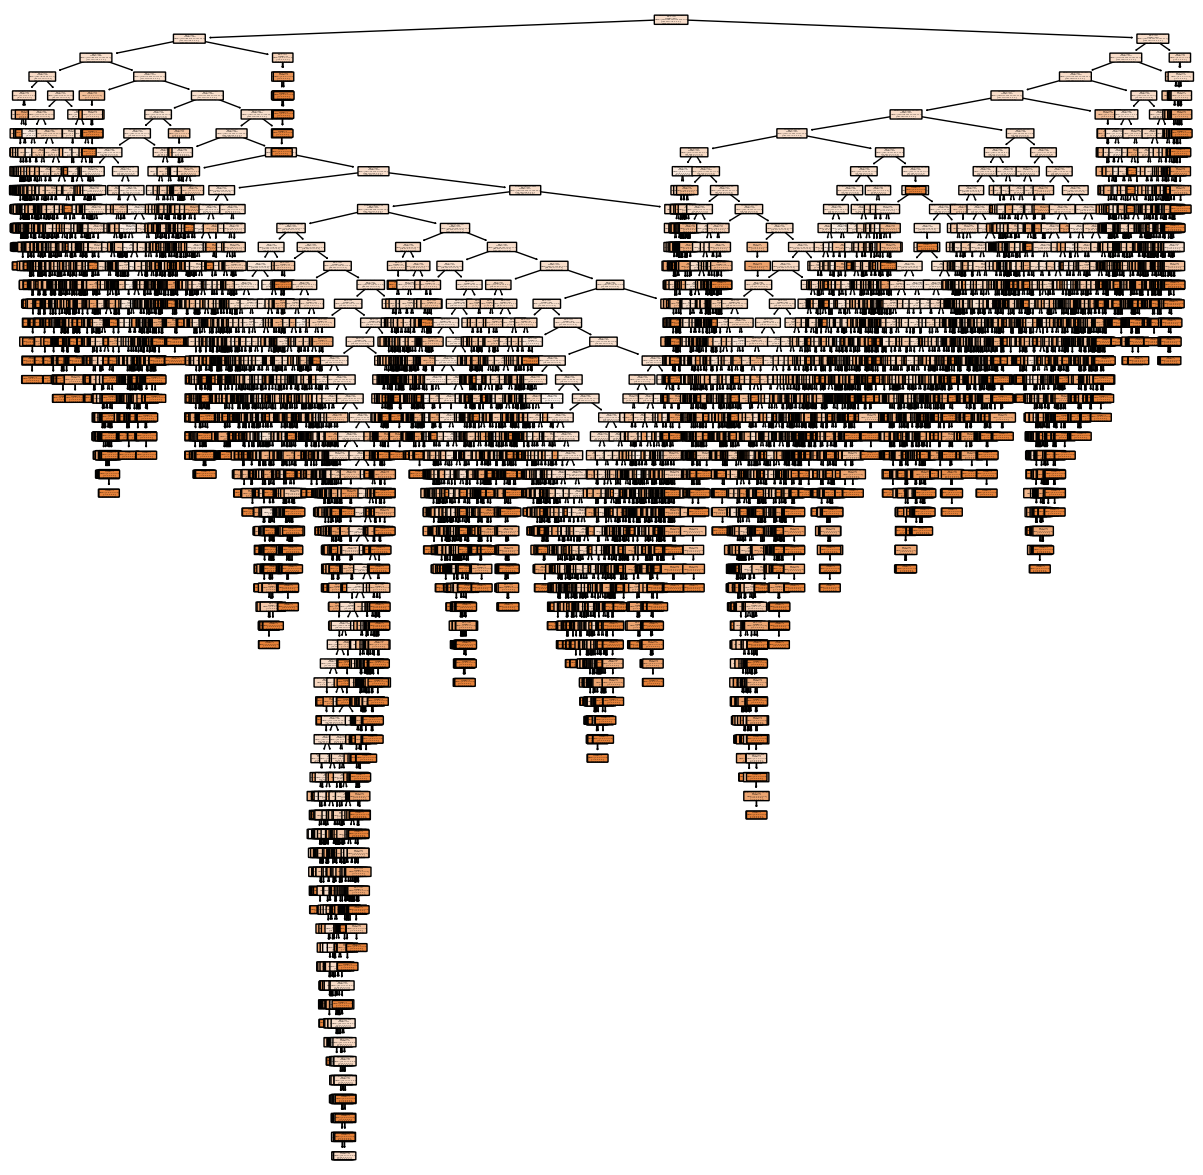

In [40]:
plt.figure(figsize = (15,15))
plot_tree(model, 
                  feature_names=X_train.columns, 
                  class_names=y_train.columns,
                  filled=True, 
                  rounded=True)

In [32]:
plt.show()

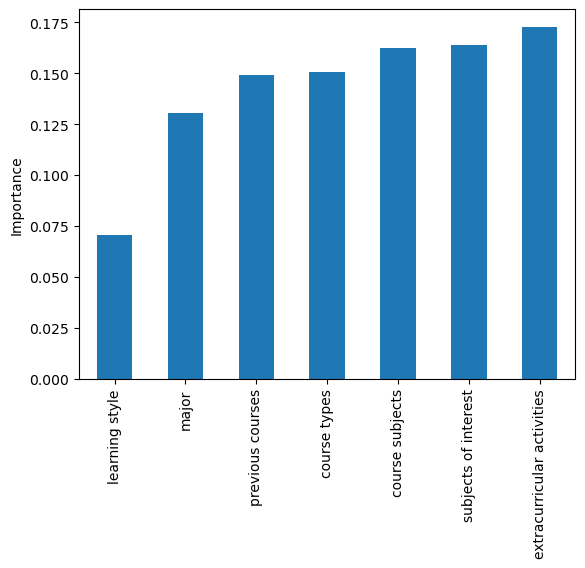

In [41]:
importance = model.feature_importances_
feature_importance = pd.Series(importance, index = X.columns)
feature_importance.plot(kind = 'bar')
plt.ylabel('Importance');

In [35]:
from sklearn.metrics import (mean_squared_error, mean_absolute_error, r2_score, accuracy_score, 
                             classification_report, precision_score, recall_score, f1_score, cohen_kappa_score, 
                             roc_auc_score, log_loss, explained_variance_score, median_absolute_error)